##**CUSTOMER CHURN PREDICTION MODEL USING LOGISTIC REGRESSION**

This is a machine learning model that uses logistic regression to predict customer churn in a banking set-up based on other independent variables.

core libraries

In [91]:
import pandas as pd        # for data loading & manipulation
import numpy as np         # for numerical operations


data preprocessing libraries

In [92]:
from sklearn.model_selection import train_test_split   # to split train/test data
from sklearn.preprocessing import StandardScaler       # to normalize numeric features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # to encode categorical variables


model library

In [93]:
from sklearn.linear_model import LogisticRegression    # logistic regression algorithm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve #MODEL EVALUATION


model visualization

In [94]:
import matplotlib.pyplot as plt    # for plots like ROC curve
import seaborn as sns              # for visualizations (heatmaps, distributions)


Dataset File

In [95]:
df=pd.read_csv('/content/sample_data/Untitled Folder/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [96]:
#statistics
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [97]:
#checking for number of rows and columns
df.shape

(10000, 12)

In [98]:
#checking for column names
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [99]:
#checking for data types in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [100]:
#missing values
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


<Axes: >

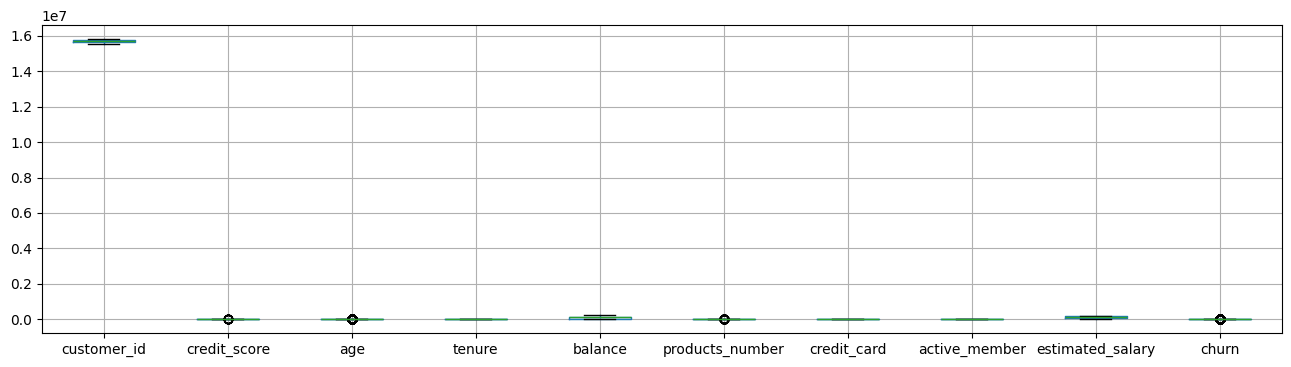

In [101]:
#checking for outliers
df.boxplot(figsize=(16,4))

array([[<Axes: title={'center': 'customer_id'}>,
        <Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'products_number'}>],
       [<Axes: title={'center': 'credit_card'}>,
        <Axes: title={'center': 'active_member'}>,
        <Axes: title={'center': 'estimated_salary'}>],
       [<Axes: title={'center': 'churn'}>, <Axes: >, <Axes: >]],
      dtype=object)

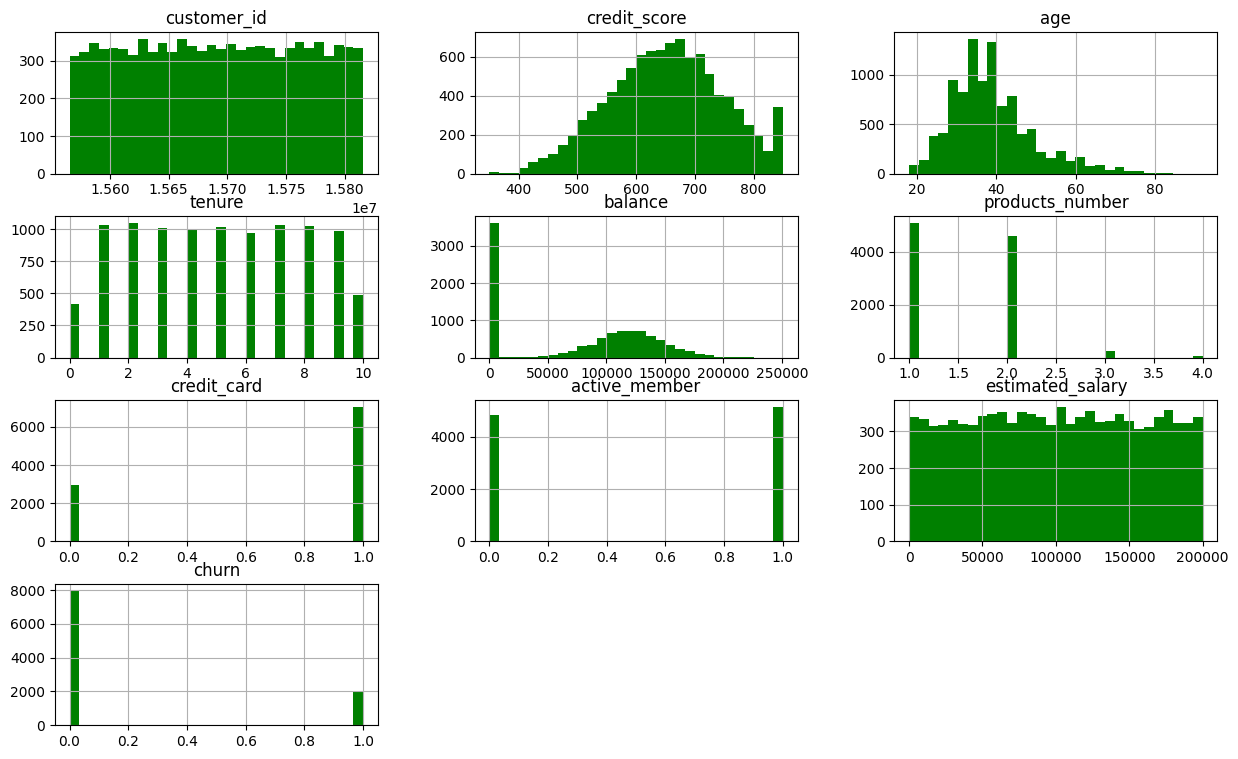

In [102]:
#checking for skewness
df.hist(figsize=(15,9), bins=30,color='green')

dropping unneccesary columns i.e customer ID

In [103]:
df = df.drop(columns=['customer_id'])

data encoding


In [104]:
df1=pd.get_dummies(df, columns=['country','gender'])
print(df1)

      credit_score  age  tenure    balance  products_number  credit_card  \
0              619   42       2       0.00                1            1   
1              608   41       1   83807.86                1            0   
2              502   42       8  159660.80                3            1   
3              699   39       1       0.00                2            0   
4              850   43       2  125510.82                1            1   
...            ...  ...     ...        ...              ...          ...   
9995           771   39       5       0.00                2            1   
9996           516   35      10   57369.61                1            1   
9997           709   36       7       0.00                1            0   
9998           772   42       3   75075.31                2            1   
9999           792   28       4  130142.79                1            1   

      active_member  estimated_salary  churn  country_France  country_Germany  \
0     

data standardization

we standardize the x-independent variable values

In [105]:
x=df1.drop(columns=['churn'])
print(x)

      credit_score  age  tenure    balance  products_number  credit_card  \
0              619   42       2       0.00                1            1   
1              608   41       1   83807.86                1            0   
2              502   42       8  159660.80                3            1   
3              699   39       1       0.00                2            0   
4              850   43       2  125510.82                1            1   
...            ...  ...     ...        ...              ...          ...   
9995           771   39       5       0.00                2            1   
9996           516   35      10   57369.61                1            1   
9997           709   36       7       0.00                1            0   
9998           772   42       3   75075.31                2            1   
9999           792   28       4  130142.79                1            1   

      active_member  estimated_salary  country_France  country_Germany  \
0            

In [106]:
scaler=StandardScaler()
scaler.fit(x)

StandardScaler()

In [107]:
#standardizing the x values
standardized_x=scaler.transform(x)
standardized_x

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57380915,
         1.09598752, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ...,  1.74273971,
         1.09598752, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57380915,
         1.09598752, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57380915,
         1.09598752, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57380915,
         1.09598752, -1.09598752]])

New data set

y=df1['churn']

x=standardized_x

###Model Selection

In [108]:
x=standardized_x

y=df1['churn']
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64


In [109]:
#checking for the dependent variable (y) which is the churn column
df1['churn'].value_counts()

,count
churn,
0,7963
1,2037


1➡ TRUE (CUSTOMERS CHURNED)

0➡ FALSE (CUSTOMERS DID NOT CHURN)















In [110]:
#heckng for the mean of the x-value and how it spreads across the other columns
df1.groupby('churn').mean(numeric_only=True)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
churn,,,,,,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.527942,0.212859,0.259199,0.427477,0.572523
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,0.397644,0.399607,0.202749,0.559156,0.440844


**Train-Test Split**

dividing the dataset (df1) into training and testing for the logistic regression model

80% training

20% testing

In [111]:
x_train, x_test,y_train, y_test=train_test_split(x,y, test_size=0.2,stratify=y, random_state=42)

In [112]:
print(x.shape,x_test.shape,x_train.shape)

(10000, 13) (2000, 13) (8000, 13)


**Training the model**

In [113]:
#create the model
model=LogisticRegression()


In [114]:
#training and fitting the model
model.fit(x_train, y_train)

LogisticRegression()

**making predictions**

In [115]:
y_pred=model.predict(x_test)
print(y_pred)

[0 0 0 ... 1 0 0]


**model evaluation**

In [116]:
#ACCURACY SCORE FOR THE TRAINING DATA
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('The accuracy score of the Training data:',training_data_accuracy)

The accuracy score of the Training data: 0.81075


In [117]:
#ACCURACY SCORE FOR THE TEST DATA
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('The accuracy of the Test Data:',test_data_accuracy)

The accuracy of the Test Data: 0.808


###**Making Predictive system**

Confusion Matrix:
[[1540   53]
 [ 331   76]]


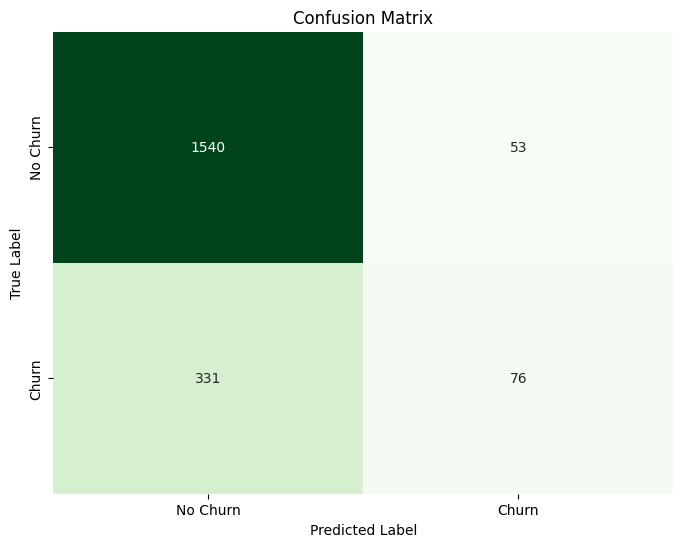

In [136]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

confusion matrix report

True Negatives (1540):
1540 customers who actually stayed → correctly predicted as “No Churn.”

False Positives (53):
53 customers who actually stayed → incorrectly predicted as “Churn.”
(Business impact: wasting retention efforts on people who wouldn’t leave anyway.)

False Negatives (331):
331 customers who actually churned → incorrectly predicted as “No Churn.”
(Business impact: these are the most dangerous — you lose customers without realizing it.)

True Positives (76):
76 customers who actually churned → correctly predicted as “Churn.”

Model Performance Insights

Accuracy = (TP + TN) / Total
= (1540 + 76) / (1540 + 53 + 331 + 76)
= 1616 / 2000 = 0.808 (80.8%)

Precision (Churn class = 1) = TP / (TP + FP)
= 76 / (76 + 53) ≈ 0.59 (59%)
→ When the model predicts churn, it’s right about 59% of the time.

Recall (Churn class = 1) = TP / (TP + FN)
= 76 / (76 + 331) ≈ 0.19 (19%)
→ Out of all actual churners, the model only catches 19%!

F1-Score (balance of precision & recall)
Low, because recall is very poor.

###**classification Report**

In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



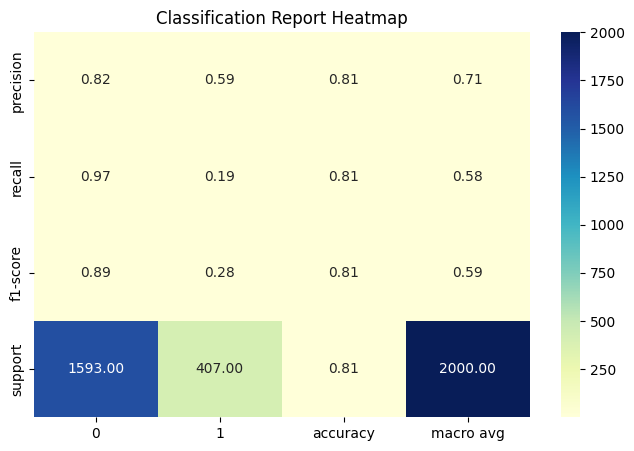

In [139]:
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
df1_report = pd.DataFrame(report).transpose()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df1_report.iloc[:-1, :].T, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()

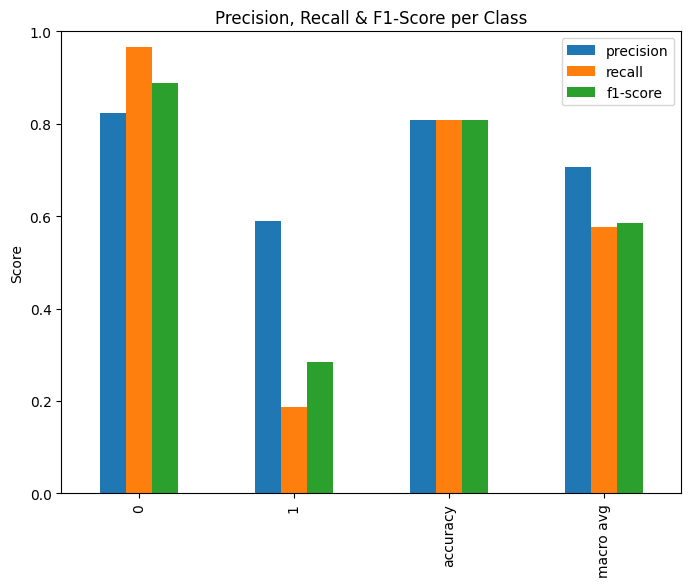

In [140]:
df1_report.iloc[:-1, :-1].plot(kind='bar', figsize=(8, 6))
plt.title("Precision, Recall & F1-Score per Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()


ROC (RECEIVER OPERATING CHARACTERISTIC CURVE) AND AUC (AREA UNDER THE ROC CURVE)

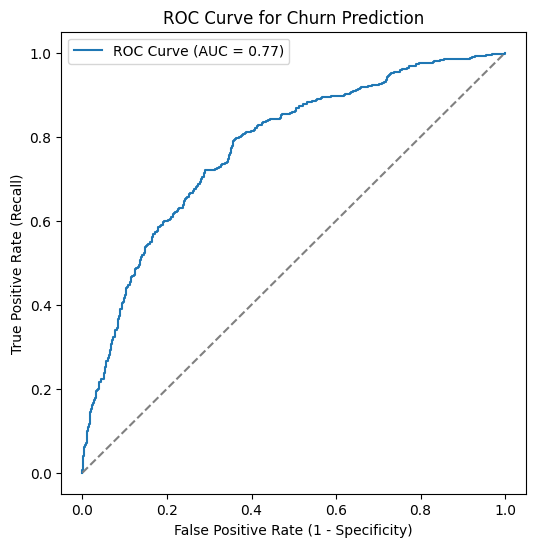

In [141]:
y_pred_prob = model.predict_proba(x_test)[:, 1]  # probability for class "1" (churn)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="grey")  # random baseline
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for Churn Prediction")
plt.legend()
plt.show()